# Matplotlib 入门

## 一. matplotlib架构

matplotlib的整体架构由位于三个不同层级的三层组成。各层之间单向通信，即每一层只能与下一层通信。Scripting(脚本)Artist(美工)Backend(后端)
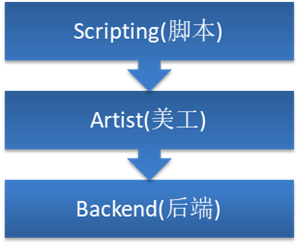


In [2]:
import matplotlib.pyplot as plt

## 二. 画图
### 2.1 折线图

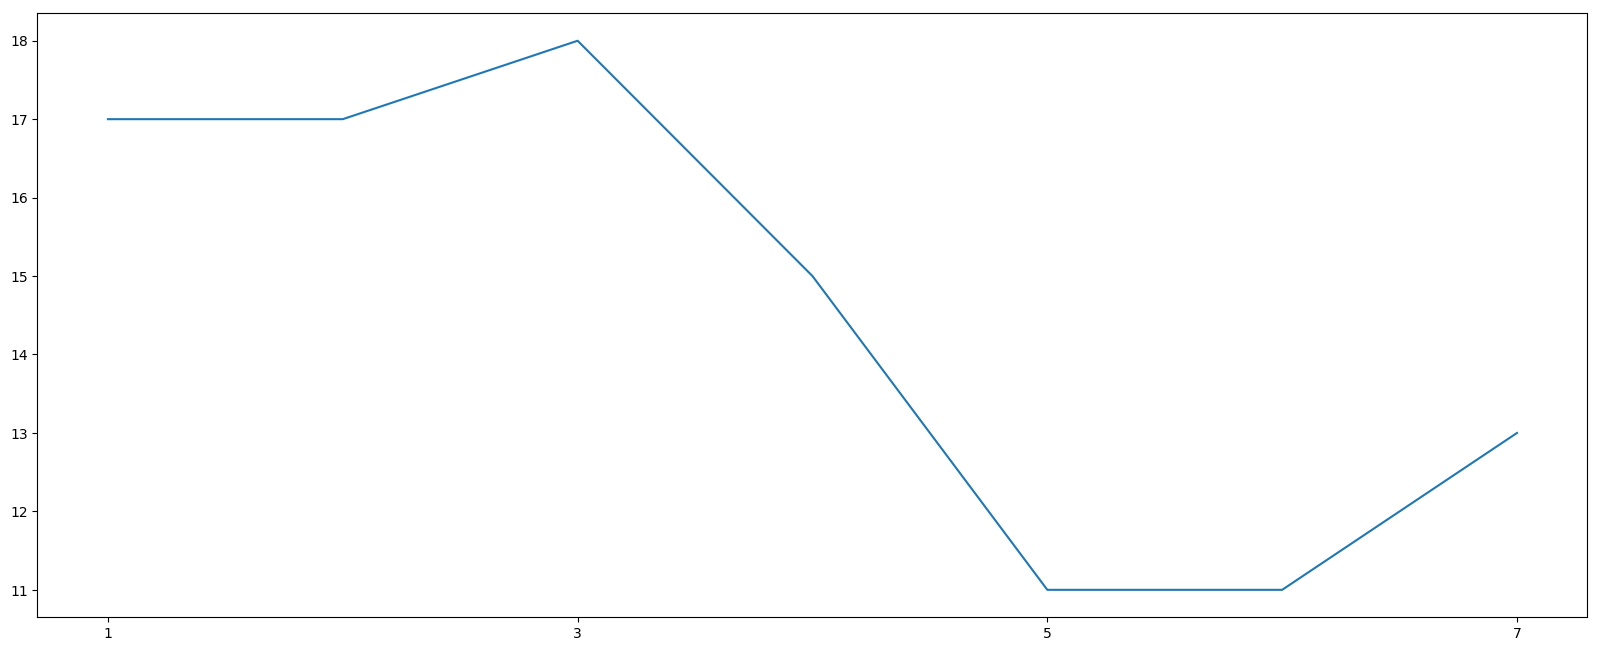

In [3]:
#修改图片大小,figsize:图片的长和高
# dpi: 清晰度
plt.figure(figsize=(20,8),dpi=100)
x = [1,2,3,4,5,6,7]
y = [17,17,18,15,11,11,13]
plt.plot(x,y)

# 调整刻度
plt.xticks(x[: : 2])

#保存图片: png,jpg,svg(矢量图)
plt.savefig("a.png")
plt.show()

解决中文乱码,需要导入一下几行代码:
```python

#导入字体管理器
from matplotlib import font_manager
#fname: 文件路径
#加载字体文件,解决x轴的乱码问题
my_font = font_manager.FontProperties(fname="FZSTK.ttf")
```

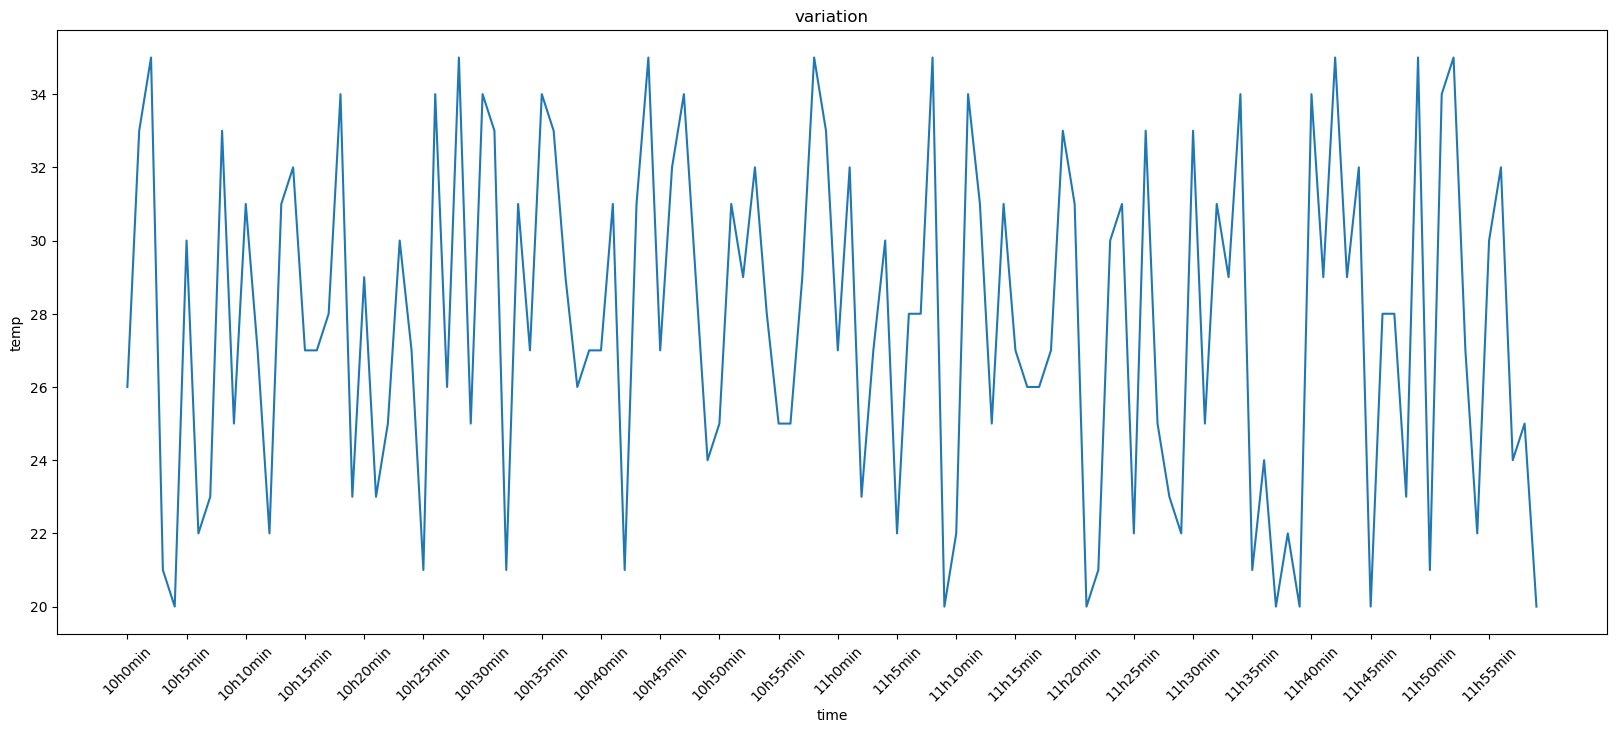

In [5]:
import random

plt.figure(figsize=(20,8),dpi=100)
x=range(120)

#生产中文列表数据
_xticks = ["10h{}min".format(i) for i in x if i<60]
_xticks += ["11h{}min".format(i-60) for i in x if i>=60]

y=[random.randint(20,35) for i in range(120)]

plt.plot(x,y)

#修改刻度
#将对应的刻度数值转换为刻度内容
plt.xticks(x[::5],_xticks[::5],rotation=45)

plt.xlabel('time')
plt.ylabel('temp')
plt.title('variation')
plt.show()

### 2.1 把两个图像绘制在一张图片上

假设大家在30岁的时候,根据自己的实际情况,统计出来了从11岁到30岁每年交的女(男)朋友的数量如列表a,请绘制出该数据的折线图,以便分析自己每年交女(男)朋友的数量走势


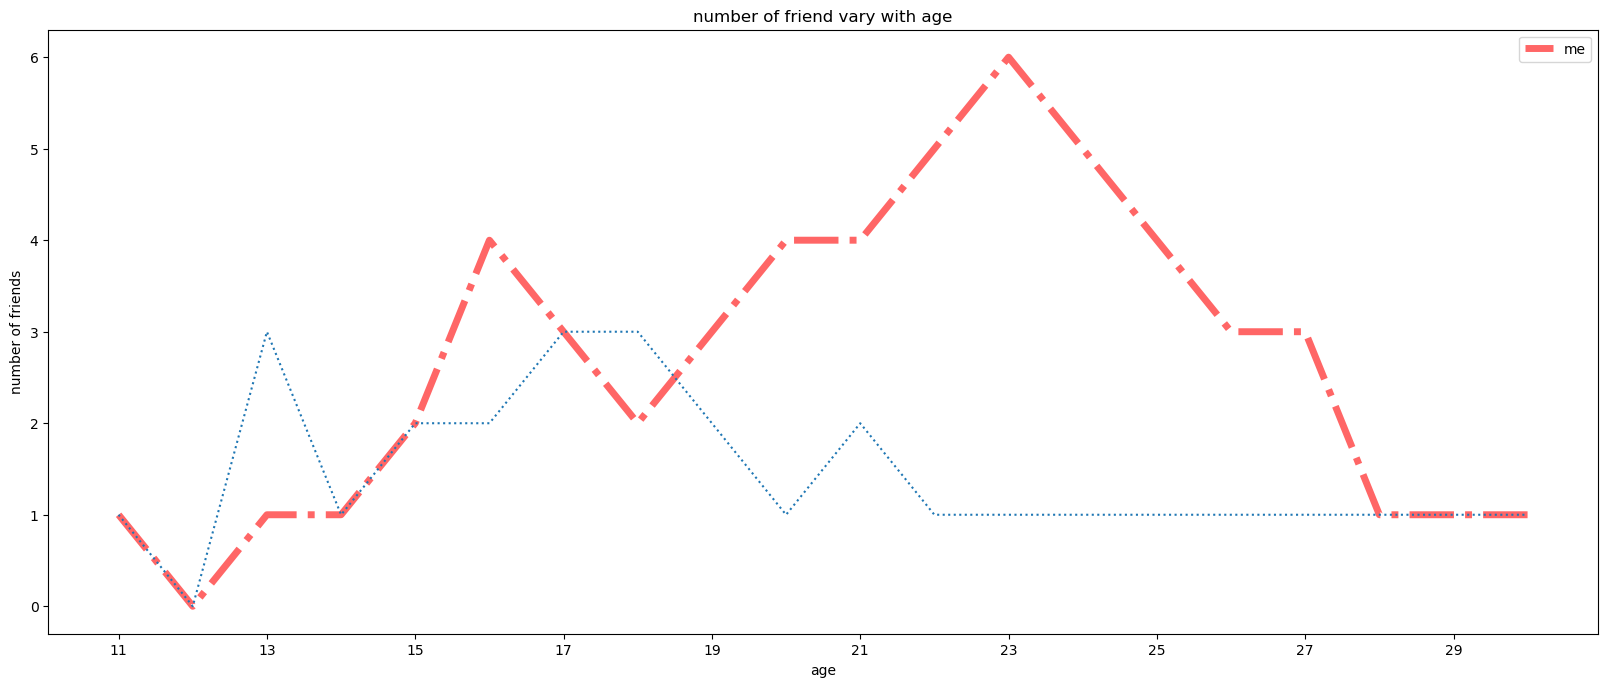

In [7]:
plt.figure(figsize=(20,8),dpi=100)
x = range(11,31)
a = [1,0,1,1,2,4,3,2,3,4,4,5,6,5,4,3,3,1,1,1]
b = [1,0,3,1,2,2,3,3,2,1,2,1,1,1,1,1,1,1,1,1]


_xticks = ["{}".format(i) for i in x]
plt.plot(x,a,linewidth=5,linestyle="-.",alpha=0.6,color='r',label='me') #linewidth加粗,alpha透明度
plt.plot(x,b,linestyle=":",label='') #linestyle 线的样式

plt.xticks(x[::2],_xticks[::2])
plt.xlabel("age")
plt.ylabel("number of friends")
plt.title("number of friend vary with age")

plt.legend(loc=0)

plt.show()

## 开启子画布

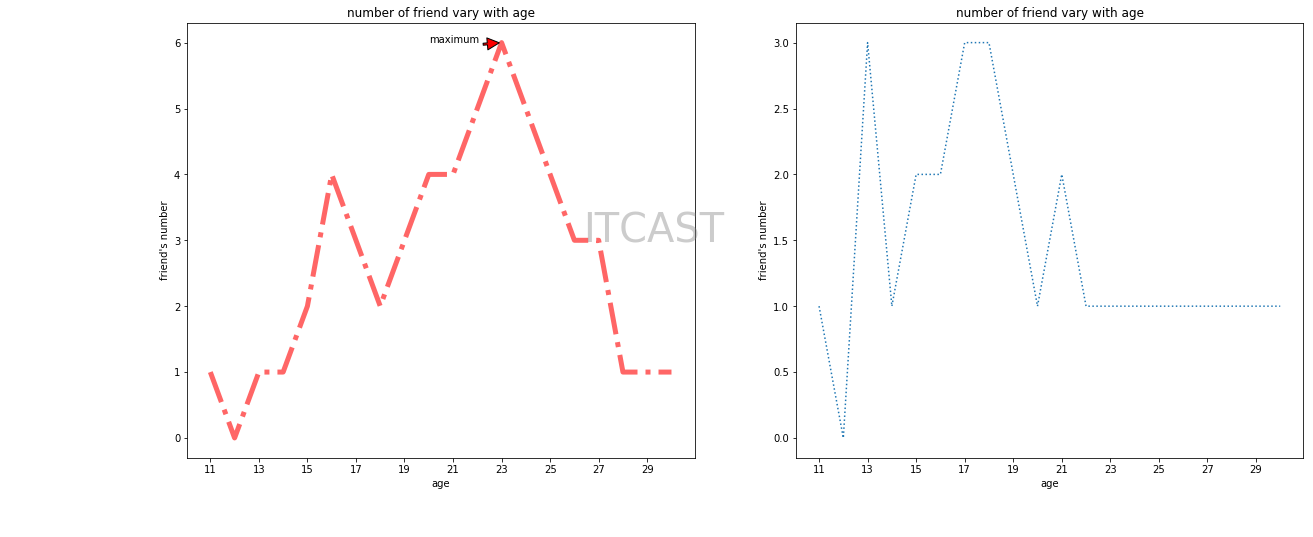

In [9]:
def set_ax(ax):
    plt.sca(ax) # 将绘图区域指定到ax,将ax的画布指定为当前画布
    plt.xticks(x[::2],_xticks[::2])
    plt.xlabel("age")
    plt.ylabel("friend's number")
    plt.title("number of friend vary with age")
    
    plt.annotate(
        'maximum',  # 显示字符串
        xy=(23, 6),  # 箭头位置
        xytext=(20,6),  # 文本位置
        arrowprops=dict(facecolor='red', shrink=0.1, width=2)  # facecolor:箭头颜色；shrink:箭头的起始和结束位置两侧的空白大小；width:箭头宽度
    )

 


#nrows: 行
#ncols: 列
#axes: 绘图区域

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

x = range(11,31)
a = [1,0,1,1,2,4,3,2,3,4,4,5,6,5,4,3,3,1,1,1]
b = [1,0,3,1,2,2,3,3,2,1,2,1,1,1,1,1,1,1,1,1]


_xticks = ["{}".format(i) for i in x]
axes[0].plot(x,a,linewidth=5,linestyle="-.",alpha=0.6,color='r') #linewidth加粗,alpha透明度
axes[1].plot(x,b,linestyle=":") #linestyle 线的样式

set_ax(axes[0])
set_ax(axes[1])
fig.text(0.4, 0.5, 'ITCAST',fontsize=40,color='gray',alpha=0.4) #加水印


plt.show()

In [10]:
print(fig) 
print(axes)

Figure(1440x576)


## 绘制散点图

假设通过爬虫你获取到了北京2016年3,10月份每天白天的最高气温(分别位于列表a,b),那么此时如何寻找出气温的整体分布规律某种规律?

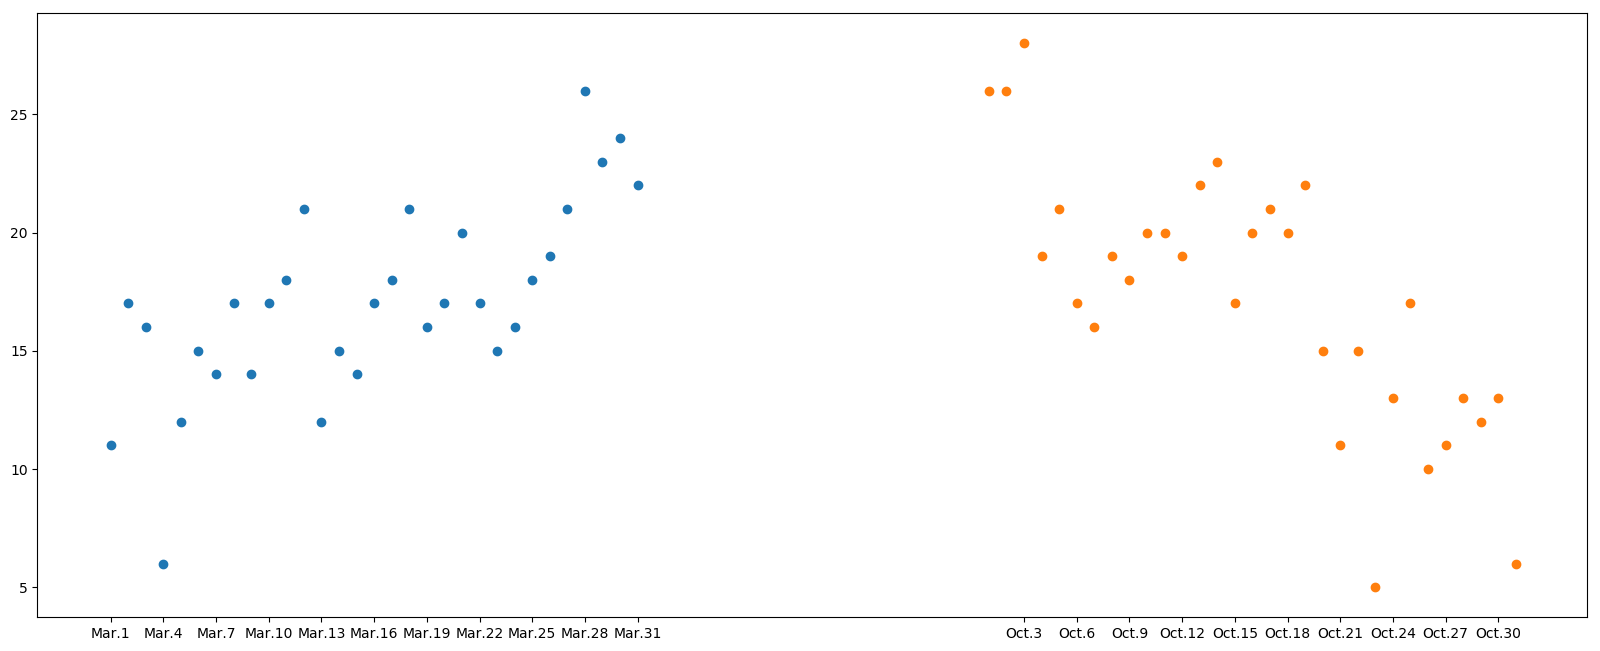

In [12]:
plt.figure(figsize=(20,8),dpi=100)
x1 = range(1,32)
x2 = range(51,82)
_x = list(x1)+list(x2)

_xticks = ["Mar.{}".format(i) for i in x1]
_xticks += ["Oct.{}".format(i) for i in x1]

a = [11,17,16,6,12,15,14,17,14,17,18,21,12,15,14,17,18,21,16,17,20,17,15,16,18,19,21,26,23,24,22]
b = [26,26,28,19,21,17,16,19,18,20,20,19,22,23,17,20,21,20,22,15,11,15,5,13,17,10,11,13,12,13,6]


plt.xticks(_x[::3],_xticks[::3])

plt.scatter(x1,a)
plt.scatter(x2,b)
plt.show()

## 绘制条形图

假设你获取到了2017年内地电影票房前20的电影(列表a)和电影票房数据(列表b),那么如何更加直观的展示该数据?

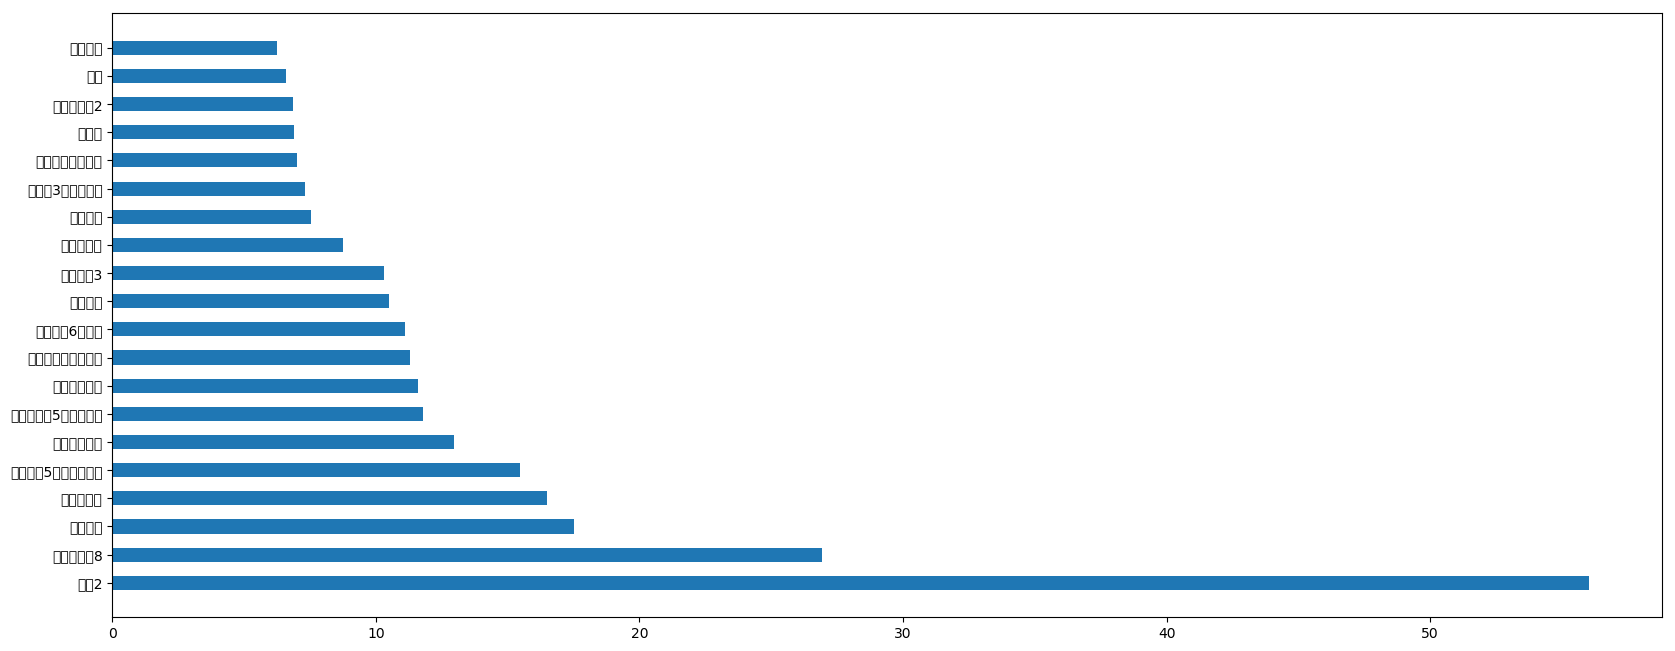

In [9]:
plt.figure(figsize=(20,8),dpi=100)

a = ["Wolf Warriors 2","速度与激情8","功夫瑜伽","西游伏妖篇","变形金刚5：最后的骑士","摔跤吧！爸爸","加勒比海盗5：死无对证","金刚：骷髅岛","极限特工：终极回归","生化危机6：终章","乘风破浪","神偷奶爸3","智取威虎山","大闹天竺","金刚狼3：殊死一战","蜘蛛侠：英雄归来","悟空传","银河护卫队2","情圣","新木乃伊",]

b= [56.01,26.94,17.53,16.49,15.45,12.96,11.8,11.61,11.28,11.12,10.49,10.3,8.75,7.55,7.32,6.99,6.88,6.86,6.58,6.23] 

x = range(len(a))

#绘制条形图
#绘制竖直的条形图
#plt.bar(x,b,width=0.5)

#绘制水平条形图
plt.barh(x,b,height=0.5)

#plt.xticks(x,a,rotation=45)
plt.yticks(x,a)

plt.show()

假设你知道了列表a中电影分别在2017-09-14(b_14), 2017-09-15(b_15), 2017-09-16(b_16)三天的票房,为了展示列表中电影本身的票房以及同其他电影的数据对比情况,应该如何更加直观的呈现该数据?

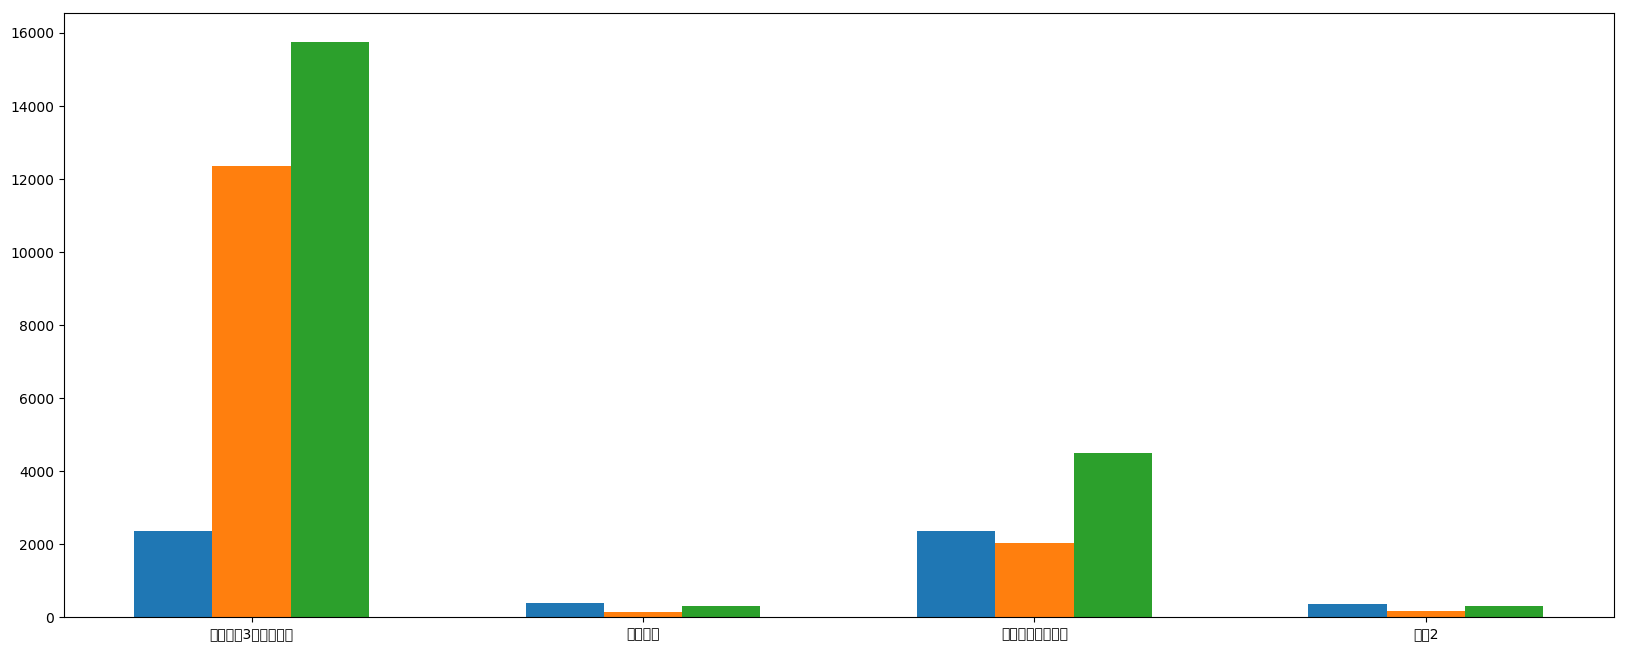

In [10]:
plt.figure(figsize=(20,8),dpi=100)
a = ["猩球崛起3：终极之战","敦刻尔克","蜘蛛侠：英雄归来","战狼2"]

bar_width = 0.2

x_14 = range(len(a))
x_15 = [i + bar_width for i in x_14]
x_16 = [i + bar_width for i in x_15]

b_16 = [15746,312,4497,319]
b_15 = [12357,156,2045,168]
b_14 = [2358,399,2358,362]

plt.bar(x_14,b_14,width=bar_width)
plt.bar(x_15,b_15,width=bar_width)
plt.bar(x_16,b_16,width=bar_width)

plt.xticks(x_15,a)

plt.show()

## 绘制直方图

假设你获取了250部电影的时长(列表a中),希望统计出这些电影时长的分布状态(比如时长为100分钟到120分钟电影的数量,出现的频率)等信息,你应该如何呈现这些数据?

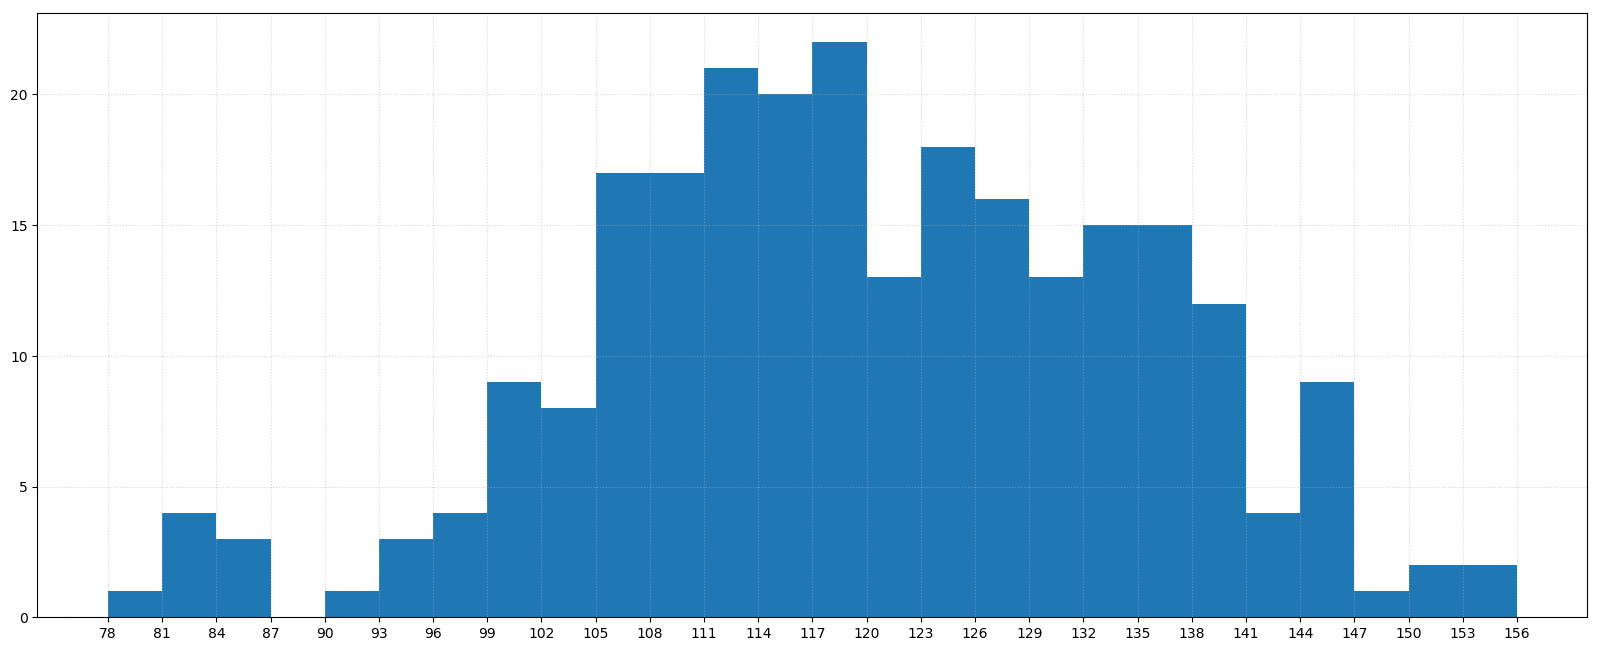

In [11]:
plt.figure(figsize=(20,8),dpi=100)

a=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

d= 5
# 分组: 组数等于极差/组距  极差:最大值-最小值
num_bins = (max(a)-min(a))//3   #//整除

plt.hist(a,num_bins)

plt.xticks(range(min(a),max(a)+1)[::3])

#绘制网格线
plt.grid(linestyle=":",alpha=0.5)


plt.show()

# 用整除方法得出的组距不对,考虑下面的方法改进

[78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133, 138, 143, 148, 153, 158]


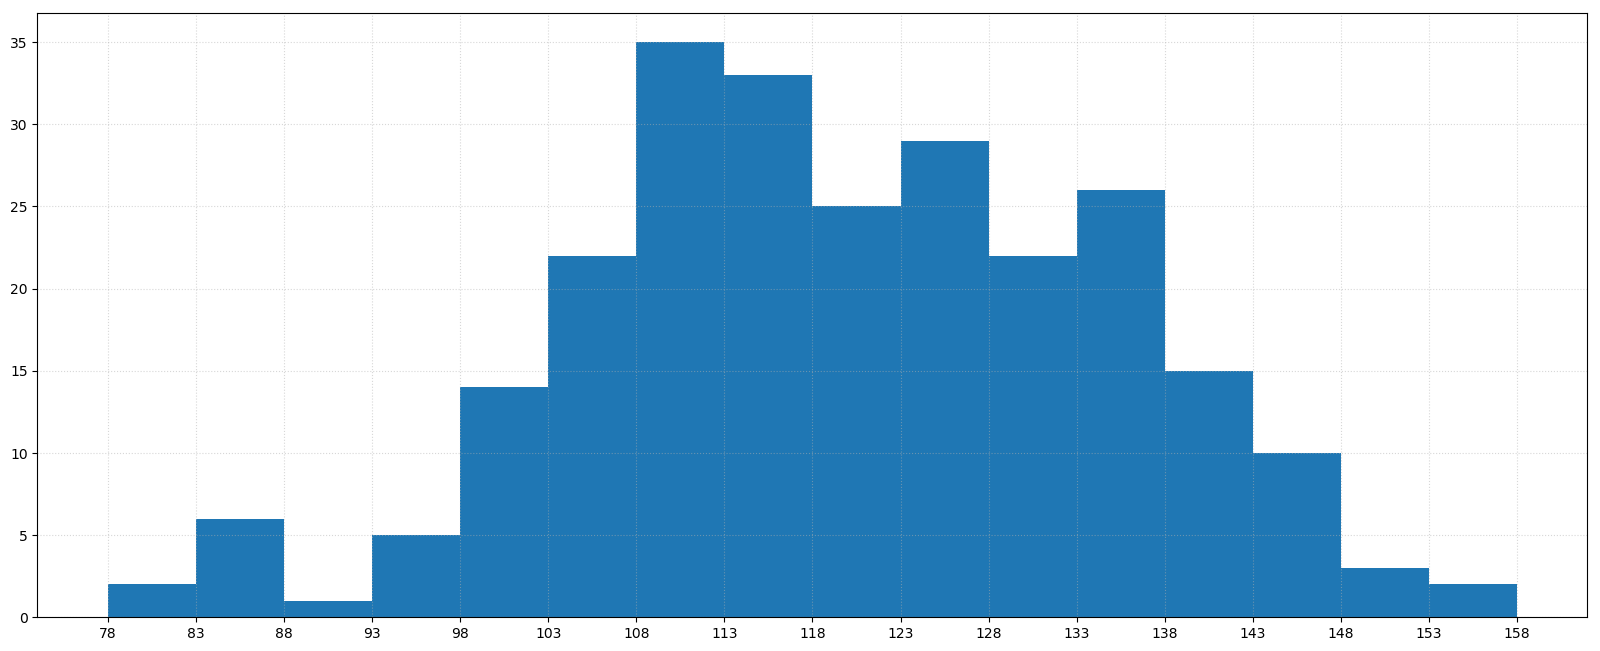

In [12]:
plt.figure(figsize=(20,8),dpi=100)

a=[131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

d= 5
#num_bins可以是个数字也可以是个列表(分组后,每个组的节点)
num_bins = [min(a)+i*d for i in range(17)]
print(num_bins)


plt.hist(a,num_bins)

plt.xticks(num_bins)

#绘制网格线
plt.grid(linestyle=":",alpha=0.5)


plt.show()

## 绘制饼图

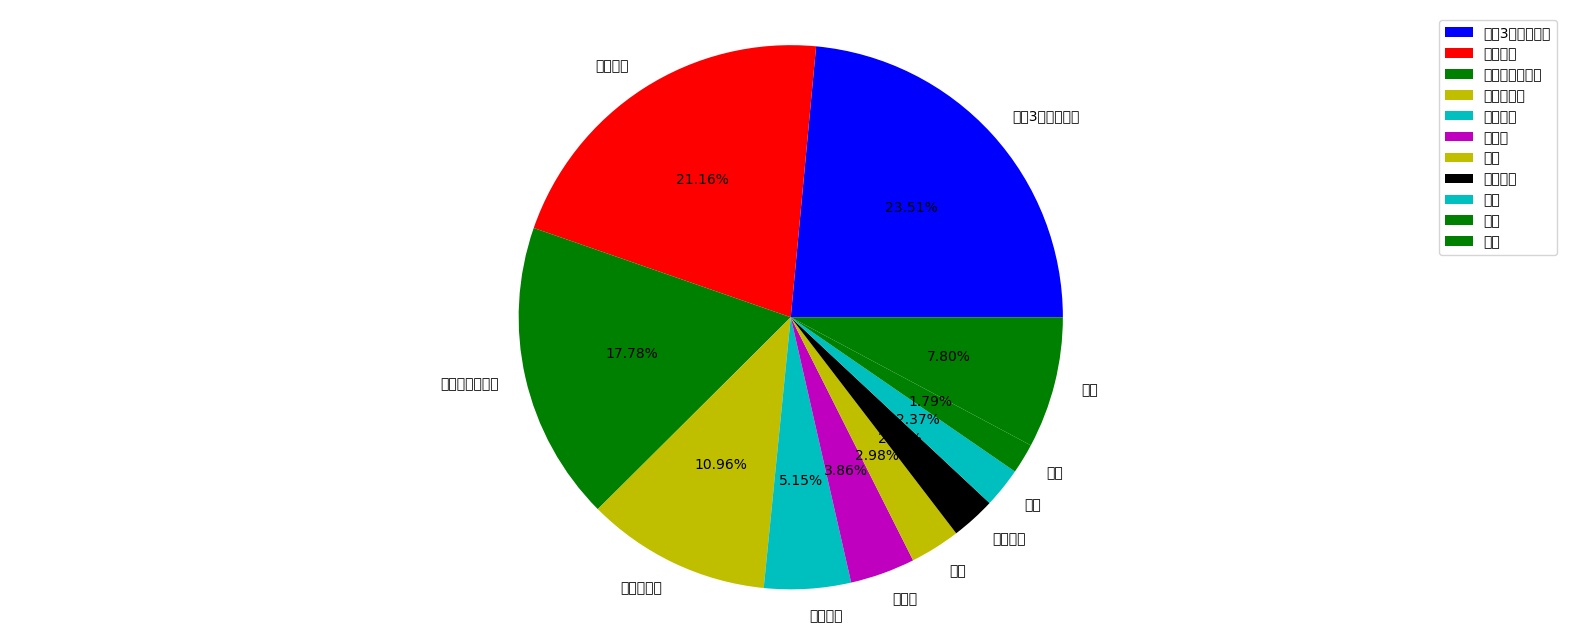

In [13]:
plt.figure(figsize=(20,8),dpi=100)

movie_name = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴',
'降魔传','追捕','七十七天','密战','狂兽','其它']

place_count = [60605,54546,45819,28243,13270,9945,7679,6799,6101,4621,20105]

plt.pie(x=place_count,labels=movie_name,autopct="%3.2f%%",colors=['b','r','g','y','c','m','y','k','c','g','g'])

plt.axis('equal')

plt.legend(loc=0)

plt.show()



In [14]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label s